importing libraries

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

importing dataset

In [105]:
dataset = pd.read_csv('facebook_marketplace_data.csv')
selected_columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
                    'num_likes', 'num_loves', 'num_wows', 'num_hahas',
                    'num_sads', 'num_angrys']
X = dataset[selected_columns].copy()


Replaces text values (e.g., "video", "photo") with integer codes like 0, 1, 2, etc.

In [106]:
from sklearn.preprocessing import LabelEncoder

# Encode status_type while X is still a DataFrame
X['status_type'] = LabelEncoder().fit_transform(X['status_type'])


Handle missing values using SimpleImputer

In [107]:

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X) # Fit and transform the data to fill missing values

using the elbow method to find the optimul numbers of clusters

In [108]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

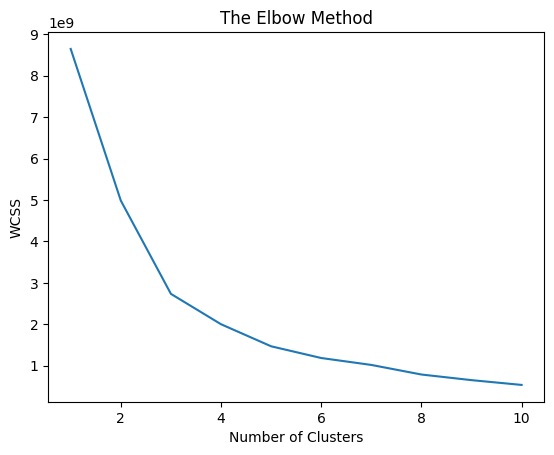

In [109]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

reduce to 2d using pca

In [110]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

traiing the kmeans model on the dataset

In [111]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

dataset['cluster'] = y_kmeans
cluster_summary = dataset.groupby('cluster')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(cluster_summary)


         num_reactions  num_comments  num_shares
cluster                                         
0           113.000000    108.951003   24.790170
1           486.737226   5309.591241  480.408759
2          1713.152893    317.871901  117.700413


visualising the clusters

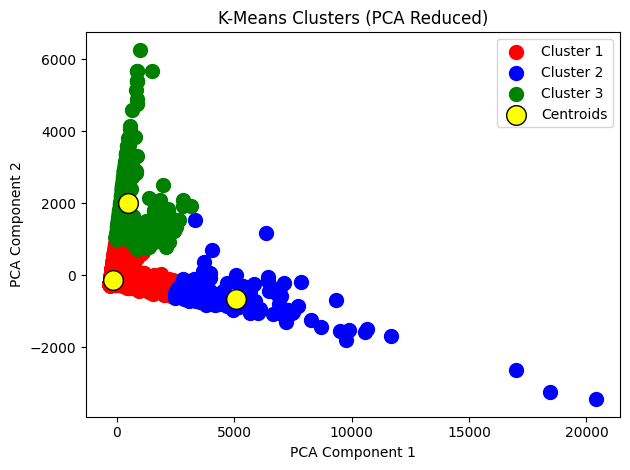

In [112]:
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='yellow', label='Centroids', edgecolor='black')

plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()

Convert 'status_published' to datetime

In [113]:
dataset['status_published'] = pd.to_datetime(dataset['status_published'], errors='coerce')
dataset['publish_hour'] = dataset['status_published'].dt.hour
dataset['publish_day'] = dataset['status_published'].dt.dayofweek


 How does time of upload affect num_reactions?

average reactions by hour

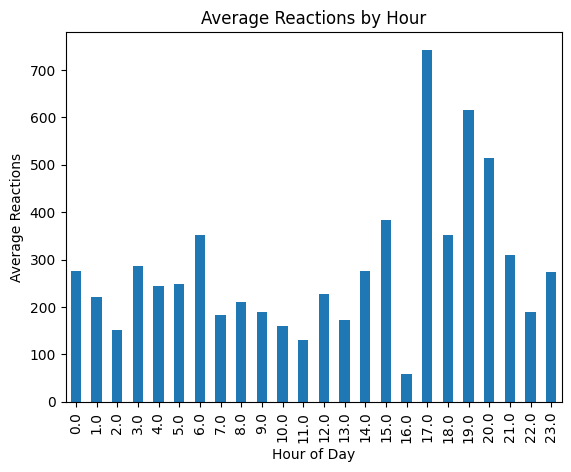

In [114]:
hourly_reactions = dataset.groupby('publish_hour')['num_reactions'].mean()
hourly_reactions.plot(kind='bar', title='Average Reactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.show()

Average reactions by day

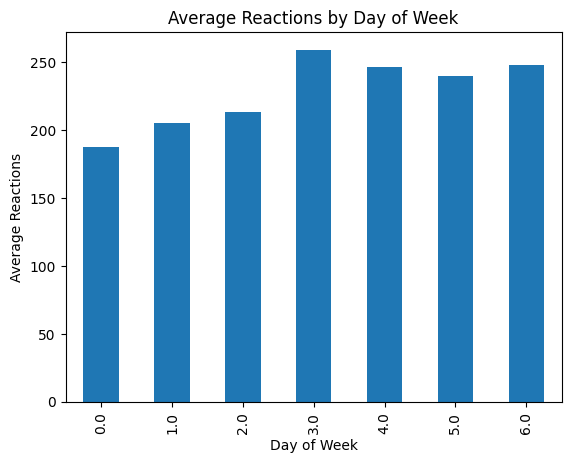

In [115]:
daily_reactions = dataset.groupby('publish_day')['num_reactions'].mean()
daily_reactions.plot(kind='bar', title='Average Reactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Reactions')
plt.show()


the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)

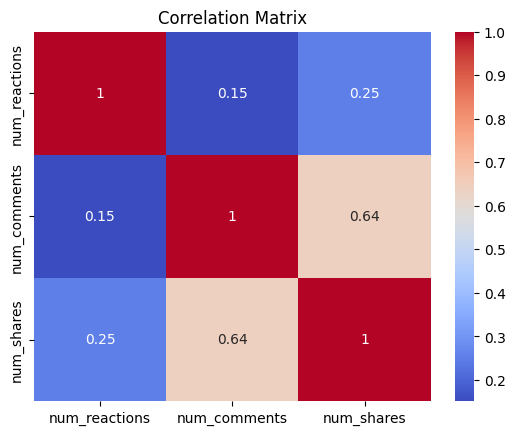

In [116]:
X_df = pd.DataFrame(X, columns=selected_columns)
X_df['num_reactions'] = dataset['num_reactions']
X_df['num_comments'] = dataset['num_comments']
X_df['num_shares'] = dataset['num_shares']




correlation_matrix = X_df[['num_reactions','num_comments','num_shares']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 the count of different types of posts in the dataset

In [117]:
post_type_counts = dataset['status_type'].value_counts()
print(post_type_counts)


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


the average value of num_reaction, num_comments, num_shares for each post type

In [118]:
# Group by 'status_type' and calculate the mean of relevant metrics
post_type_avg = dataset.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Display the result
print(post_type_avg)


             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
